# Gradient based Visualization of VGG net

In [1]:
from keras.applications.vgg16 import VGG16
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import tensorflow as tf
import PIL.Image
import keras.backend as K
from matplotlib import pylab as plt
import os, sys
from os.path import dirname, join, abspath
%matplotlib inline

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
IMG_DIR = './images/'
UTILS_DIR = '../common_utils/'
sys.path.insert(0, abspath(join(dirname(UTILS_DIR), '.')))
sys.path.insert(0, abspath(join(dirname(IMG_DIR), '.')))
from Utils import load_image,show_image

# Load images

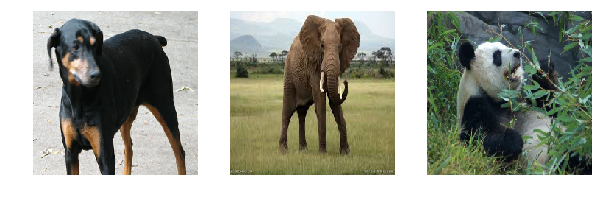

In [3]:
image_names = [image_name for image_name in os.listdir(IMG_DIR)]
imgs=[]
N = str(len(image_names))
fig = plt.figure(figsize=(10,10))
for i,image_name in enumerate(image_names):
    if image_name.endswith(".jpeg") or image_name.endswith(".jpg") or image_name.endswith(".png"):
        path = os.path.join(IMG_DIR, image_name)
        img = load_image(path)
        imgs.append(img)
        show_image(img, ax=plt.subplot('1'+N+str(i)), grayscale=False)

# Load Model

In [4]:
model = VGG16(weights='imagenet')
model.compile(loss='mean_squared_error', optimizer='adam')

#Expand Images
imgs = [np.expand_dims(image, axis=0) for image in imgs]

# Get Predictions

In [5]:
# Load and compile the model
labels,preds = [],[]
for i, img_name in enumerate(image_names):
    img = imgs[i]
    pred = model.predict(img)
    label = np.argmax(pred)
    labels.append(label)
    preds.append(decode_predictions(pred, top=1)[0])
    print ('{:>19}: Predicted:'.format(img_name), decode_predictions(pred, top=1)[0], label)

   happy_animal.jpg: Predicted: [('n02510455', 'giant_panda', 0.99992204)] 388
       doberman.png: Predicted: [('n02091134', 'whippet', 0.5138523)] 172
      Elephant.jpeg: Predicted: [('n02504458', 'African_elephant', 0.71316725)] 386


# Get Gradient Saliancy Map 

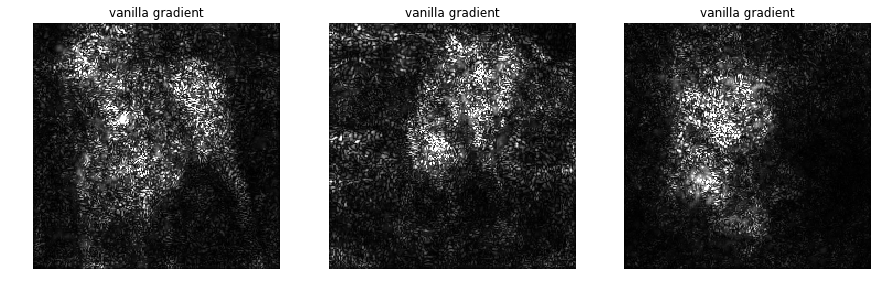

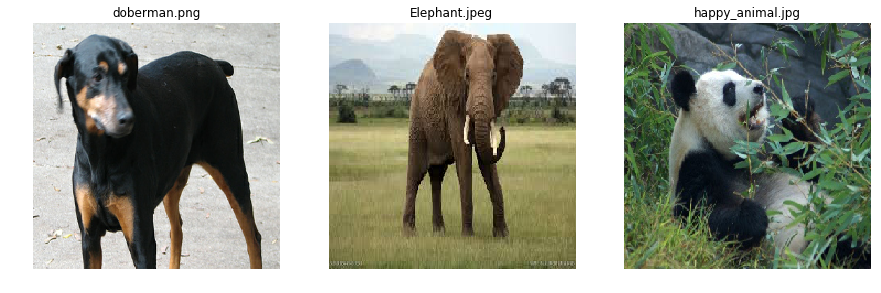

In [6]:
from Mask import GradientSaliencyMask
fig = plt.figure(figsize=(15,15))
for i,img in enumerate(imgs):
    vanilla = GradientSaliencyMask(model,labels[i])
    mask = vanilla.get_mask(img.reshape((224, 224, 3)))
    show_image(mask, ax = plt.subplot('1'+N+str(i)), title='vanilla gradient',grayscale=True)
    
fig = plt.figure(figsize=(15,15))
for i,img in enumerate(imgs):
    show_image(img.reshape((224, 224, 3)), ax = plt.subplot('1'+N+str(i)), title=image_names[i],grayscale=False)
fig.savefig('grad_viz.jpg', dpi=200)